Going to explore the new cleaned player data and hopefully run some information on more team data and aggregates of their players

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

# Load the cleaned data
file_path = os.getenv('CLEANED_PLAYERS_DATA_PATH')
if file_path is None:
    raise ValueError("CLEANED_PLAYERS_DATA_PATH environment variable not set.")

cleaned_data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
cleaned_data.head()

,PlayerID,SportsDataID,Status,TeamID,Team,Jersey,PositionCategory,Position,MLBAMID,FirstName,...,Height,Weight,BirthDate,BirthCity,BirthState,BirthCountry,HighSchool,College,ProDebut,Experience
0,10000005,NaN,Non-Roster Invitee,17,DET,NaN,P,RP,605177.0,Andrew,...,74.0,235.0,1990-06-17,Kettering,OH,Usa,NaN,Kent State,2014-08-13,11.0
1,10000020,NaN,Active,15,SF,38.0,P,SP,592662.0,Robbie,...,74.0,225.0,1991-10-01,Brentwood,TN,Usa,Brentwood (TN),None,2014-05-06,11.0
2,10000029,NaN,Non-Roster Invitee,28,TEX,23.0,IF,SS,605113.0,Nick,...,74.0,201.0,1990-03-15,Springfield,MA,Usa,NaN,Connecticut,2014-06-29,11.0
3,10000030,NaN,Non-Roster Invitee,16,CHW,28.0,IF,2B,592273.0,Brandon,...,74.0,230.0,1992-08-21,Grants Pass,OR,Usa,Grants Pass (OR),None,2015-09-01,10.0
4,10000031,NaN,Active,29,NYY,48.0,IF,1B,502671.0,Paul,...,75.0,225.0,1987-09-10,Wilmington,DE,Usa,NaN,Texas State,2011-08-01,14.0


In [5]:
# Create a dictionary to store DataFrames for each team
team_dataframes = {}

# Iterate over unique teams and create a DataFrame for each team
for team in cleaned_data['Team'].unique():
    team_df = cleaned_data[cleaned_data['Team'] == team]
    team_dataframes[team] = team_df
# Function to get a DataFrame for a specific team
def get_team_dataframe(team):
    return team_dataframes.get(team.upper())
# Example: Access the DataFrame for the Detroit Tigers (DET)
det_players_df = team_dataframes.get('DET')
if det_players_df is not None:
    print(f"Detroit Tigers DataFrame:\n{det_players_df.head()}")

# Example: Access the DataFrame for the San Francisco Giants (SF)
sf_players_df = team_dataframes.get('SF')
if sf_players_df is not None:
    print(f"San Francisco Giants DataFrame:\n{sf_players_df.head()}")

Detroit Tigers DataFrame:
     PlayerID  SportsDataID              Status  TeamID Team  Jersey  \
0    10000005           NaN  Non-Roster Invitee      17  DET     NaN   
19   10000213           NaN              Active      17  DET    28.0   
37   10000378           NaN              Active      17  DET    43.0   
114  10001191           NaN              Active      17  DET    38.0   
225  10005288           NaN              Active      17  DET    18.0   

    PositionCategory Position   MLBAMID FirstName  ... Height Weight  \
0                  P       RP  605177.0    Andrew  ...   74.0  235.0   
19                IF       SS  595879.0    Javier  ...   72.0  190.0   
37                 P       RP  592454.0     Tommy  ...   73.0  230.0   
114                P       SP  502171.0      Alex  ...   75.0  205.0   
225                P       SP  628317.0     Kenta  ...   73.0  185.0   

      BirthDate  BirthCity  BirthState BirthCountry  \
0    1990-06-17  Kettering          OH          Usa  

In [6]:
# Access the DataFrame for the New York Yankees (NYY)
nyy_players_df = get_team_dataframe('NYY')
if nyy_players_df is not None:
    print(f"New York Yankees DataFrame:\n{nyy_players_df.head()}")

# Access the DataFrame for the Boston Red Sox (BOS)
bos_players_df = get_team_dataframe('BOS')
if bos_players_df is not None:
    print(f"Boston Red Sox DataFrame:\n{bos_players_df.head()}")

New York Yankees DataFrame:
    PlayerID  SportsDataID              Status  TeamID Team  Jersey  \
4   10000031           NaN              Active      29  NYY    48.0   
32  10000330           NaN  Non-Roster Invitee      29  NYY    59.0   
38  10000383           NaN  Non-Roster Invitee      29  NYY    68.0   
41  10000397           NaN              Active      29  NYY    26.0   
69  10000690           NaN              Active      29  NYY    27.0   

   PositionCategory Position   MLBAMID  FirstName  ... Height Weight  \
4                IF       1B  502671.0       Paul  ...   75.0  225.0   
32                P       SP  471911.0     Carlos  ...   76.0  224.0   
38                P       RP  554431.0      Tyler  ...   75.0  230.0   
41               IF       3B  518934.0         DJ  ...   76.0  220.0   
69               DH       DH  519317.0  Giancarlo  ...   78.0  245.0   

     BirthDate      BirthCity  BirthState BirthCountry  \
4   1987-09-10     Wilmington          DE          Usa

DET: 217 players
SF: 223 players
TEX: 218 players
CHW: 224 players
NYY: 225 players
LAD: 227 players
ARI: 213 players
TOR: 206 players
ATH: 215 players
SD: 185 players
SEA: 223 players
CIN: 209 players
MIN: 202 players
LAA: 197 players
NYM: 224 players
HOU: 229 players
ATL: 200 players
MIA: 241 players
BOS: 235 players
CLE: 221 players
STL: 201 players
PHI: 245 players
CHC: 245 players
KC: 190 players
PIT: 238 players
TB: 213 players
MIL: 252 players
BAL: 217 players
COL: 197 players
WSH: 213 players


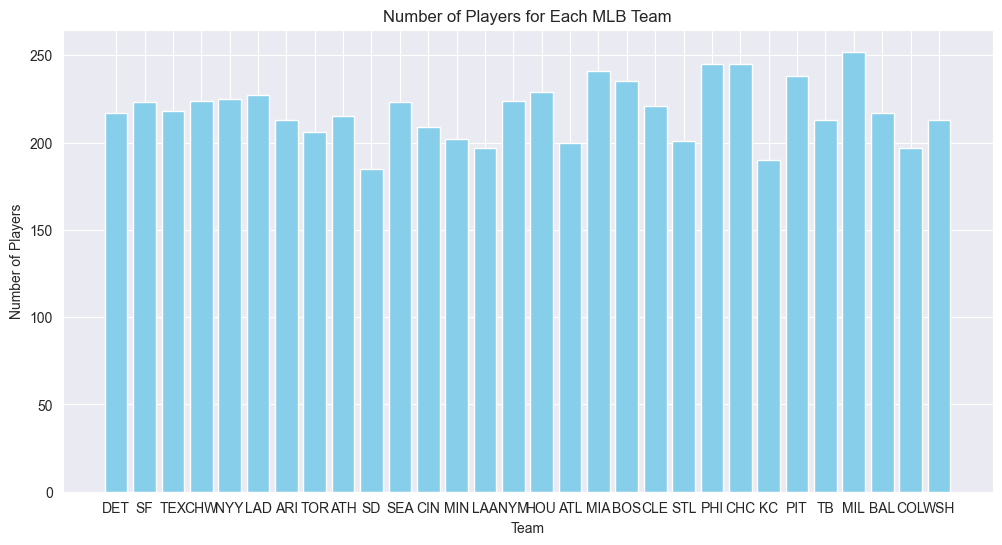

In [9]:

# Display the number of players for each team

# Create a dictionary to store the number of players for each team
team_player_counts = {}

# Iterate over the team DataFrames and count the number of players for each team

for team, team_df in team_dataframes.items():
    team_player_counts[team] = len(team_df)
    
# Display the number of players for each team

for team, player_count in team_player_counts.items():
    print(f"{team}: {player_count} players")
    
# Create a bar plot of the number of players for each team

# Set the style of the plot
sns.set_style("darkgrid")

# Create a bar plot

plt.figure(figsize=(12, 6))
plt.bar(team_player_counts.keys(), team_player_counts.values(), color='skyblue')
plt.xlabel('Team')
plt.ylabel('Number of Players')
plt.title('Number of Players for Each MLB Team')
plt.show()

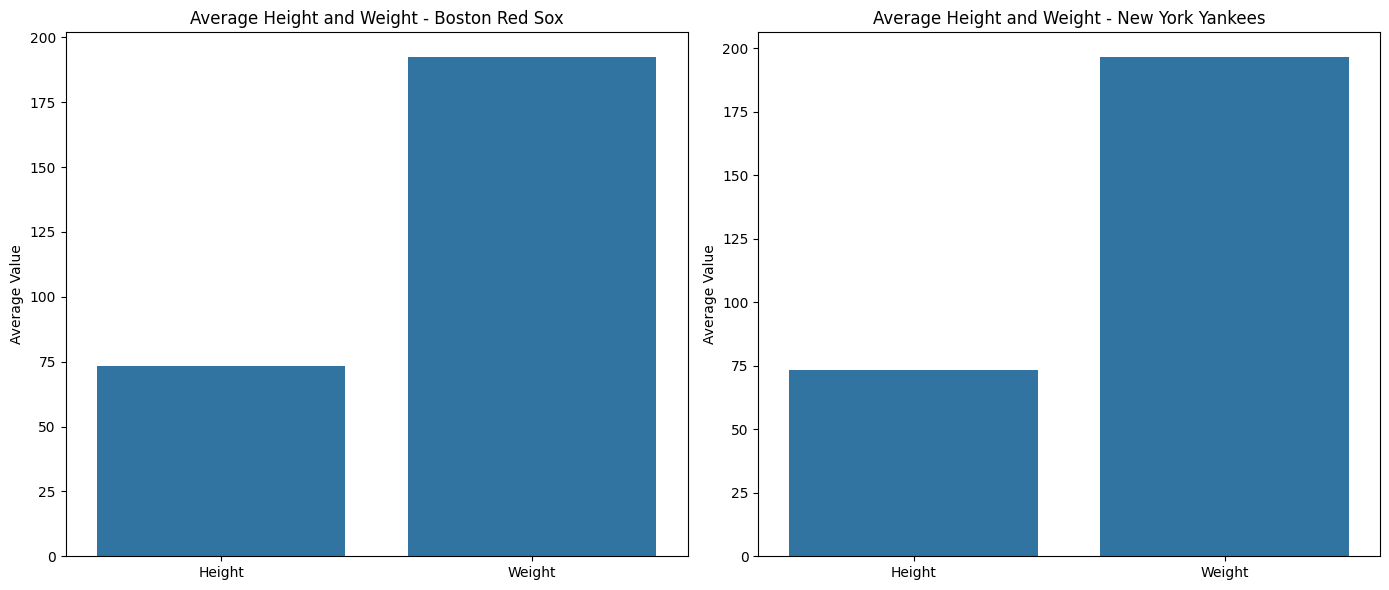

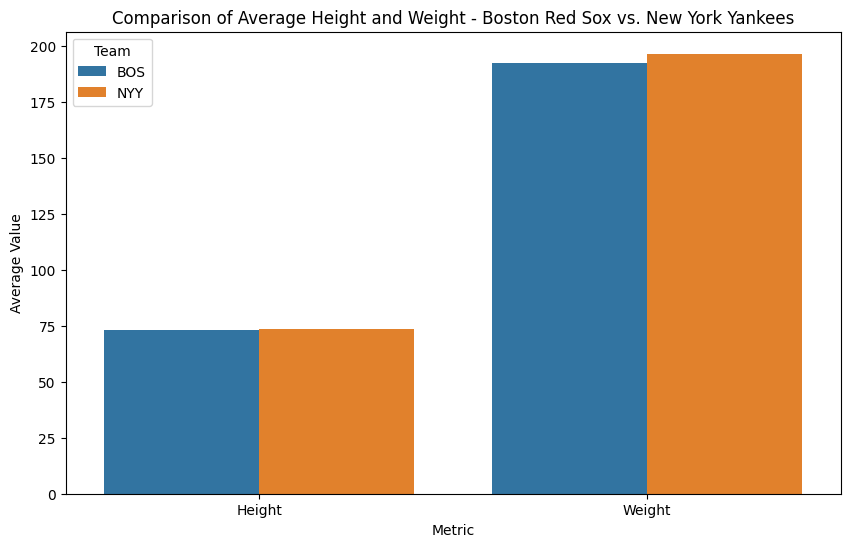

In [7]:
# Calculate average height and weight for each team
bos_avg_height = bos_players_df['Height'].mean()
bos_avg_weight = bos_players_df['Weight'].mean()
nyy_avg_height = nyy_players_df['Height'].mean()
nyy_avg_weight = nyy_players_df['Weight'].mean()

# Create individual charts for each team
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boston Red Sox chart
sns.barplot(x=['Height', 'Weight'], y=[bos_avg_height, bos_avg_weight], ax=axes[0])
axes[0].set_title('Average Height and Weight - Boston Red Sox')
axes[0].set_ylabel('Average Value')

# New York Yankees chart
sns.barplot(x=['Height', 'Weight'], y=[nyy_avg_height, nyy_avg_weight], ax=axes[1])
axes[1].set_title('Average Height and Weight - New York Yankees')
axes[1].set_ylabel('Average Value')

plt.tight_layout()
plt.show()

# Create a combined chart to compare the averages
avg_data = pd.DataFrame({
    'Team': ['BOS', 'BOS', 'NYY', 'NYY'],
    'Metric': ['Height', 'Weight', 'Height', 'Weight'],
    'Average': [bos_avg_height, bos_avg_weight, nyy_avg_height, nyy_avg_weight]
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Average', hue='Team', data=avg_data)
plt.title('Comparison of Average Height and Weight - Boston Red Sox vs. New York Yankees')
plt.ylabel('Average Value')
plt.show()

In [11]:
stl_players_df = get_team_dataframe('STL')
chc_players_df = get_team_dataframe('CHC')
cin_players_df = get_team_dataframe('CIN')
pit_players_df = get_team_dataframe('PIT')
mil_players_df = get_team_dataframe('MIL')
tex_players_df = get_team_dataframe('TEX')
hou_players_df = get_team_dataframe('HOU')
kc_players_df = get_team_dataframe('KC')
cle_players_df = get_team_dataframe('CLE')
min_players_df = get_team_dataframe('MIN')
det_players_df = get_team_dataframe('DET')
cws_players_df = get_team_dataframe('CWS')
sea_players_df = get_team_dataframe('SEA')
oak_players_df = get_team_dataframe('ATH')
laa_players_df = get_team_dataframe('LAA')
ari_players_df = get_team_dataframe('ARI')
sd_players_df = get_team_dataframe('SD')
col_players_df = get_team_dataframe('COL')
sf_players_df = get_team_dataframe('SF')
lad_players_df = get_team_dataframe('LAD')
nym_players_df = get_team_dataframe('NYM')
atl_players_df = get_team_dataframe('ATL')
phi_players_df = get_team_dataframe('PHI')
mia_players_df = get_team_dataframe('MIA')
tb_players_df = get_team_dataframe('TB')
tor_players_df = get_team_dataframe('TOR')
bal_players_df = get_team_dataframe('BAL')
was_players_df = get_team_dataframe('WSH')
bos_players_df = get_team_dataframe('BOS')
nyy_players_df = get_team_dataframe('NYY')


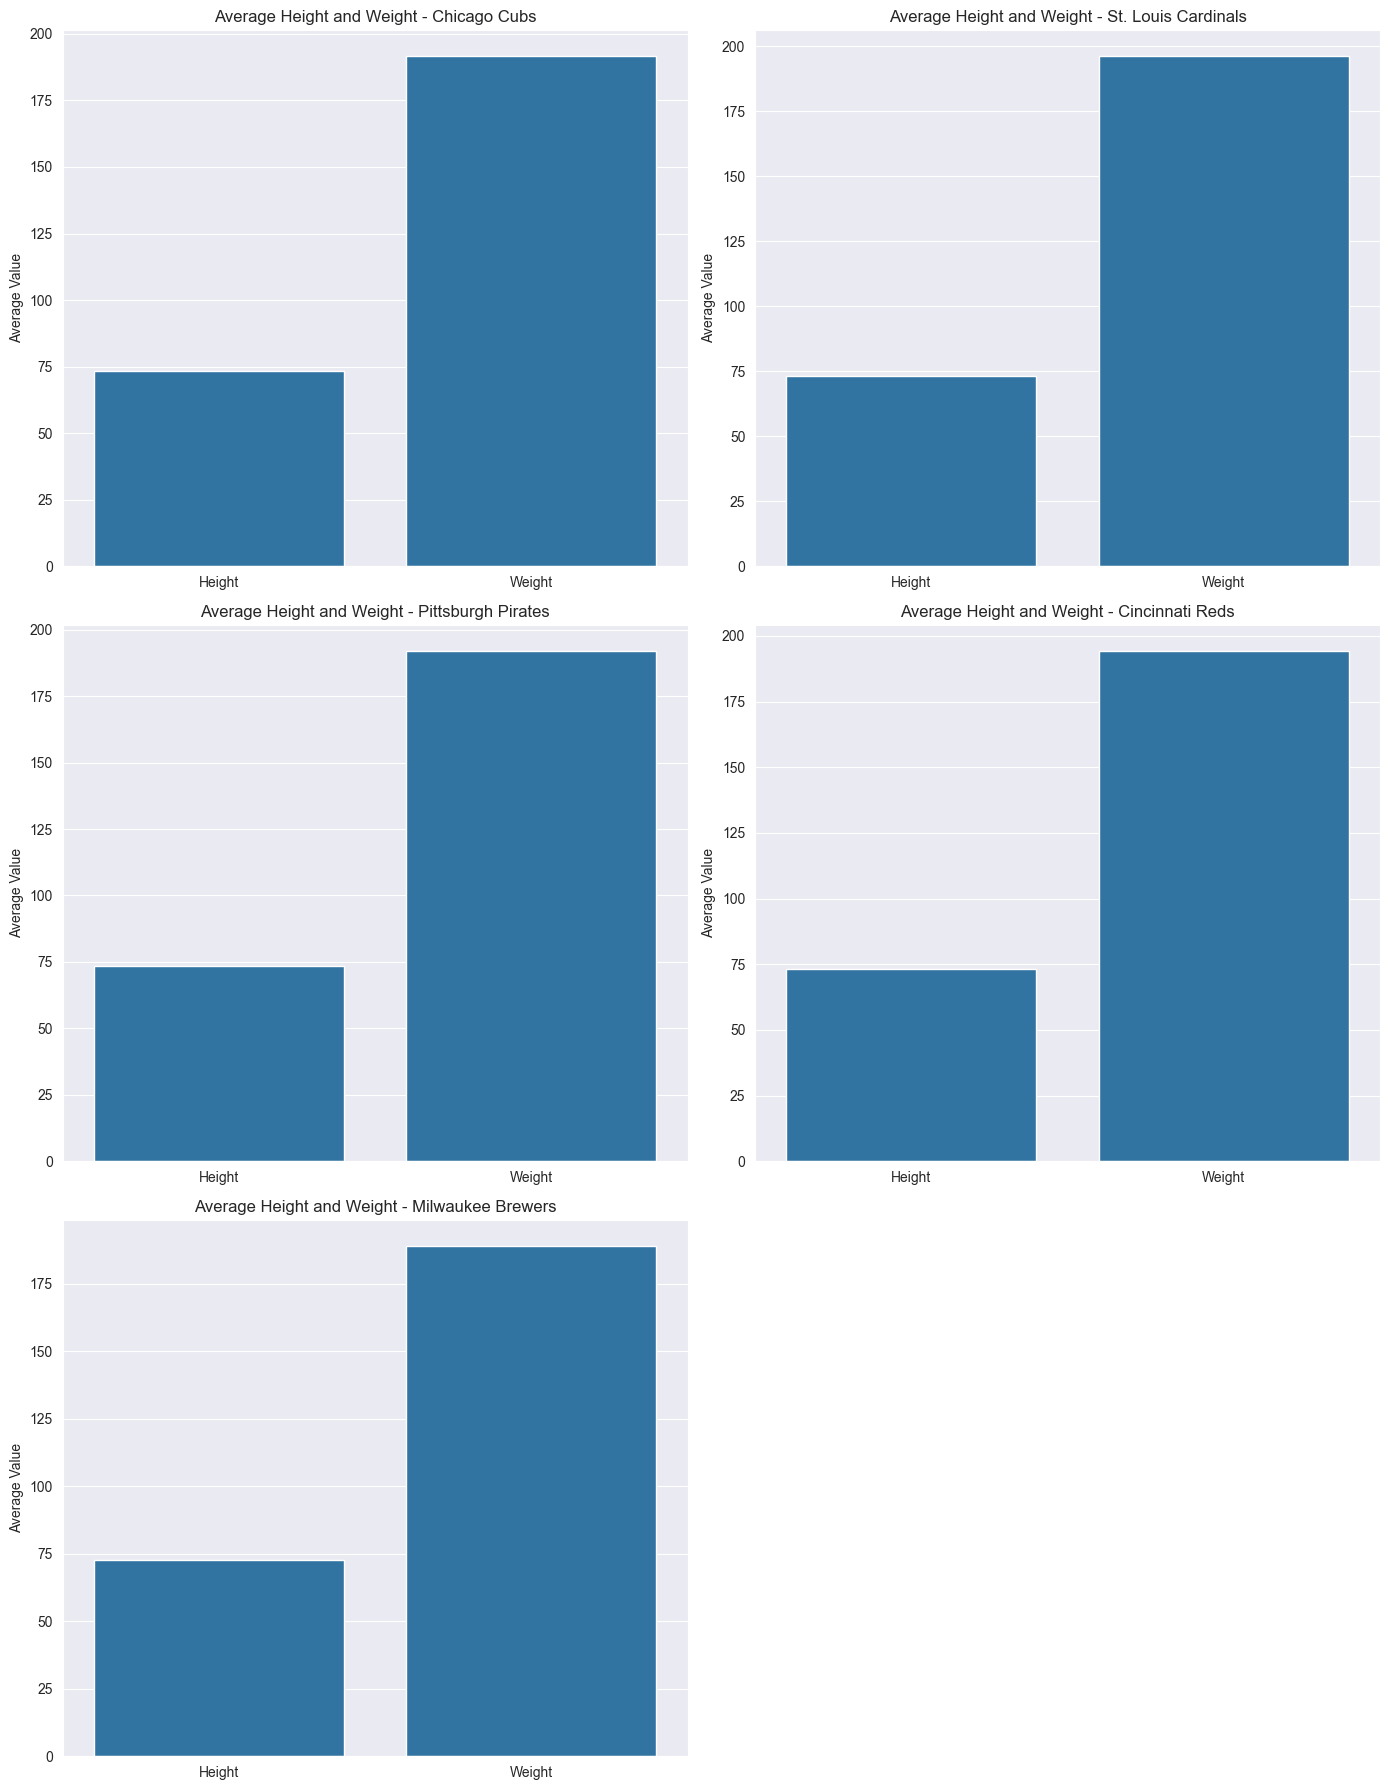

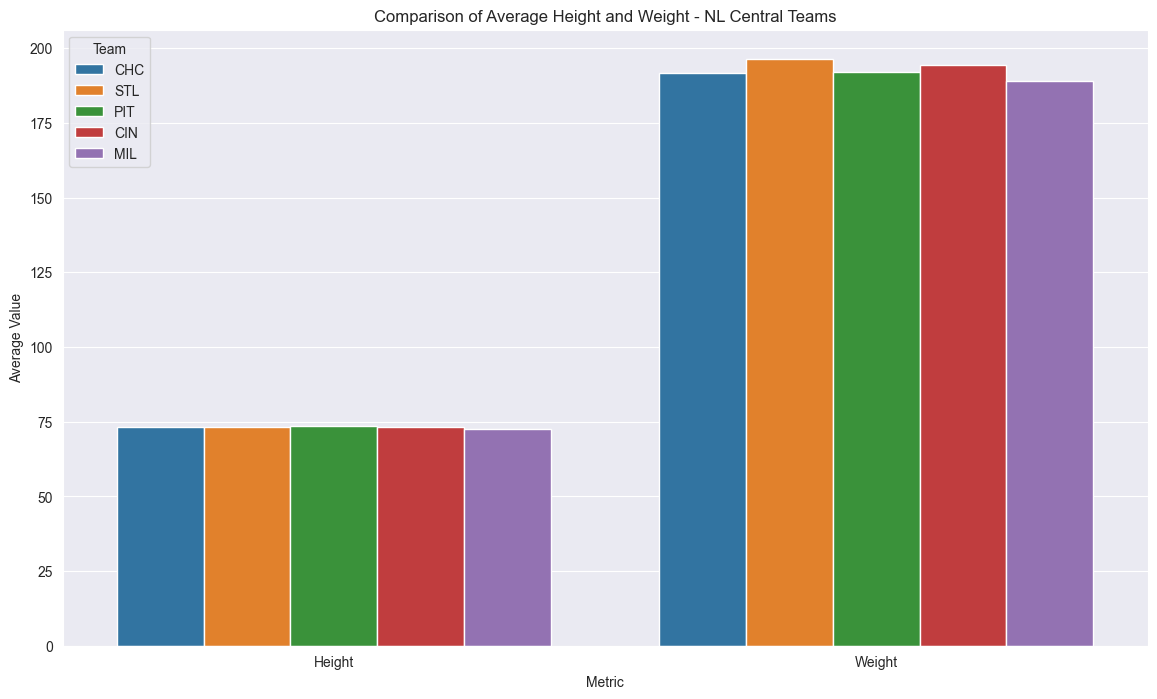

In [12]:
# Calculate average height and weight for each team
chc_avg_height = chc_players_df['Height'].mean()
chc_avg_weight = chc_players_df['Weight'].mean()
stl_avg_height = stl_players_df['Height'].mean()
stl_avg_weight = stl_players_df['Weight'].mean()
pit_avg_height = pit_players_df['Height'].mean()
pit_avg_weight = pit_players_df['Weight'].mean()
cin_avg_height = cin_players_df['Height'].mean()
cin_avg_weight = cin_players_df['Weight'].mean()
mil_avg_height = mil_players_df['Height'].mean()
mil_avg_weight = mil_players_df['Weight'].mean()

# Create individual charts for each team
fig, axes = plt.subplots(3, 2, figsize=(14, 18))

# Chicago Cubs chart
sns.barplot(x=['Height', 'Weight'], y=[chc_avg_height, chc_avg_weight], ax=axes[0, 0])
axes[0, 0].set_title('Average Height and Weight - Chicago Cubs')
axes[0, 0].set_ylabel('Average Value')

# St. Louis Cardinals chart
sns.barplot(x=['Height', 'Weight'], y=[stl_avg_height, stl_avg_weight], ax=axes[0, 1])
axes[0, 1].set_title('Average Height and Weight - St. Louis Cardinals')
axes[0, 1].set_ylabel('Average Value')

# Pittsburgh Pirates chart
sns.barplot(x=['Height', 'Weight'], y=[pit_avg_height, pit_avg_weight], ax=axes[1, 0])
axes[1, 0].set_title('Average Height and Weight - Pittsburgh Pirates')
axes[1, 0].set_ylabel('Average Value')

# Cincinnati Reds chart
sns.barplot(x=['Height', 'Weight'], y=[cin_avg_height, cin_avg_weight], ax=axes[1, 1])
axes[1, 1].set_title('Average Height and Weight - Cincinnati Reds')
axes[1, 1].set_ylabel('Average Value')

# Milwaukee Brewers chart
sns.barplot(x=['Height', 'Weight'], y=[mil_avg_height, mil_avg_weight], ax=axes[2, 0])
axes[2, 0].set_title('Average Height and Weight - Milwaukee Brewers')
axes[2, 0].set_ylabel('Average Value')

# Hide the empty subplot
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

# Create a combined chart to compare the averages
avg_data = pd.DataFrame({
    'Team': ['CHC', 'CHC', 'STL', 'STL', 'PIT', 'PIT', 'CIN', 'CIN', 'MIL', 'MIL'],
    'Metric': ['Height', 'Weight', 'Height', 'Weight', 'Height', 'Weight', 'Height', 'Weight', 'Height', 'Weight'],
    'Average': [chc_avg_height, chc_avg_weight, stl_avg_height, stl_avg_weight, pit_avg_height, pit_avg_weight, cin_avg_height, cin_avg_weight, mil_avg_height, mil_avg_weight]
})

plt.figure(figsize=(14, 8))
sns.barplot(x='Metric', y='Average', hue='Team', data=avg_data)
plt.title('Comparison of Average Height and Weight - NL Central Teams')
plt.ylabel('Average Value')
plt.show()

In [ ]:
# Print the average height and weight for each team
print(f"Chicago Cubs - Average Height: {chc_avg_height:.2f}, Average Weight: {chc_avg_weight:.2f}")
print(f"Chicago Cubs - Average Height: {chc_avg_weight:.2f}, Average Weight: {chc_avg_weight:.2f}")
print(f"St. Louis Cardinals - Average Height: {stl_avg_height:.2f}, Average Weight: {stl_avg_weight:.2f}")
print(f"St. Louis Cardinals - Average Height: {stl_avg_weight:.2f}, Average Weight: {stl_avg_weight:.2f}")
print(f"Pittsburgh Pirates - Average Height: {pit_avg_height:.2f}, Average Weight: {pit_avg_weight:.2f}")
print(f"Cincinnati Reds - Average Height: {cin_avg_height:.2f}, Average Weight: {cin_avg_weight:.2f}")
print(f"Milwaukee Brewers - Average Height: {mil_avg_height:.2f}, Average Weight: {mil_avg_weight:.2f}")
